In [ ]:
import numpy as np
import pandas as pd
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import get_sun

In [ ]:
# 1. Определение координат наблюдателя (Москва)
observer_location = EarthLocation(lat=55.0*u.deg, lon=37.0*u.deg, height=200*u.m)

# 2. Время наблюдения для эпохи Hipparcos (J1991.25)
time = Time('1991-04-02T00:00:00', scale='utc')

# 3. Поле зрения камеры и высота/азимут (центр на зените, угол обзора 18°x18°)
fov_alt_center = 90 * u.deg  # высота центра - зенит
fov_az_center = 0 * u.deg  # азимут для центра (зенит)

# Поле зрения камеры: границы по высоте и азимуту
fov_alt_min = (fov_alt_center - 40 * u.deg).to(u.deg)
fov_alt_max = (fov_alt_center + 40 * u.deg).to(u.deg)
fov_az_min = (fov_az_center - 40 * u.deg).to(u.deg)
fov_az_max = (fov_az_center + 40 * u.deg).to(u.deg)

In [ ]:
time

In [ ]:
print(f'alt_center: {fov_alt_center} \naz_center: {fov_az_center}')

In [ ]:
observer_location

In [ ]:
# 4. Чтение звездного каталога (файл Hipparcos в формате CSV)
df = pd.read_csv('Catalogue.csv')

stars = SkyCoord(ra=df['RA']*u.deg, dec=df['Dec']*u.deg, frame='icrs')

# 5. Преобразование в горизонтальную систему координат (Alt-Az)
altaz_frame = AltAz(obstime=time, location=observer_location)
stars_altaz = stars.transform_to(altaz_frame)

# Выведем несколько первых звезд, чтобы увидеть их Alt и Az
print("Первые 10 звезд после преобразования в горизонтальную систему (Alt-Az):")
for i in range(10):
    print(f"Звезда {i+1}: Высота (Alt) = {stars_altaz.alt[i].deg}, Азимут (Az) = {stars_altaz.az[i].deg}")

In [ ]:
altaz_frame

In [ ]:
# 6. Фильтрация звезд по полю зрения камеры (попадают ли звезды в диапазон высоты и азимута)
in_fov = (stars_altaz.alt >= fov_alt_min) & (stars_altaz.alt <= fov_alt_max) & \
         (stars_altaz.az >= fov_az_min) & (stars_altaz.az <= fov_az_max)


print(f"Количество звезд в поле зрения камеры: {np.sum(in_fov)}")

# Отфильтрованные звезды
filtered_stars = df[in_fov]

# 7. Сохранение отфильтрованных звезд в новый файл
#filtered_stars.to_csv('filtered_stars.csv', index=False)


In [ ]:
in_fov

In [ ]:
filtered_stars

In [ ]:
import matplotlib.pyplot as plt


ra = stars.ra[in_fov].deg    # Прямое восхождение звезд в поле зрения
dec = stars.dec[in_fov].deg  # Склонение звезд в поле зрения

# Определим центр поля зрения
ra_center = np.median(ra)  # Медианное значение по RA
dec_center = np.median(dec)  # Медианное значение по Dec

# Размеры поля зрения камеры (80x80 градусов)
ra_fov = 10  # Поле зрения по RA
dec_fov = 10 # Поле зрения по Dec

# Создаем черный фон для графика
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black')
ax.set_facecolor('black')

# Устанавливаем границы графика по RA и Dec согласно полю зрения камеры
ax.set_xlim(ra_center - ra_fov / 2, ra_center + ra_fov / 2)  # Отклонение в пределах 40 градусов по RA
ax.set_ylim(dec_center - dec_fov / 2, dec_center + dec_fov / 2)  # Отклонение в пределах 40 градусов по Dec

# Убираем оси и сетку для эстетики
#ax.set_xticks([])
#ax.set_yticks([])
#ax.grid(False)

# Добавляем звезды как белые точки
ax.scatter(ra, dec, c='white', s=1, alpha=0.75)

# Отметим точку центра поля зрения для проверки
#ax.scatter([ra_center], [dec_center], c='red', s=50, label='Center of FOV')

# Добавляем подписи для ориентации
#ax.text(ra_center + (ra_fov / 2) - 2, dec_center, 'East', color='white', ha='center', va='center')
#ax.text(ra_center - (ra_fov / 2) + 2, dec_center, 'West', color='white', ha='center', va='center')

# Отображаем график
plt.show()

In [ ]:
print(stars_altaz.alt[in_fov].deg[:10])  # Высота
print(stars_altaz.az[in_fov].deg[:10])  # Азимут

In [ ]:
fov_alt_center = 90 * u.deg  # высота центра - зенит
fov_az_center = 0 * u.deg  # азимут для центра (зенит)

# Поле зрения камеры: границы по высоте и азимуту
fov_alt_min = (fov_alt_center - 40 * u.deg).to(u.deg)
fov_alt_max = (fov_alt_center + 40 * u.deg).to(u.deg)
fov_az_min = (fov_az_center - 40 * u.deg).to(u.deg)
fov_az_max = (fov_az_center + 40 * u.deg).to(u.deg)

In [ ]:
df = pd.read_csv('Catalogue.csv')

alpha = df['RA']  # Прямое восхождение в радианах
delta = df['Dec']  # Склонение в радианах

# Центр проекции (область интереса)
alpha_0 = 90
delta_0 = 45

cot_delta = 1 / np.tan(delta)

xi = (cot_delta * np.sin(alpha - alpha_0)) / (np.sin(delta_0) + cot_delta * np.cos(delta_0) * np.cos(alpha - alpha_0))

eta = (np.cos(delta) - cot_delta * np.sin(delta_0) * np.cos(alpha - alpha_0)) / (np.sin(delta_0) + cot_delta * np.cos(delta_0) * np.cos(alpha - alpha_0))


In [ ]:
new_in_fov = (xi >= fov_alt_min) & (xi<= fov_alt_max) & \
         (eta>= fov_az_min) & (eta <= fov_az_max)

print(f"Количество звезд в поле зрения камеры: {np.sum(in_fov)}")

# Отфильтрованные звезды
new_filtered_stars = df[in_fov]

In [ ]:
new_filtered_stars

In [ ]:
# Создаем график с белыми точками на черном фоне
plt.figure(figsize=(8, 8), facecolor='black')
plt.scatter(xi, eta, color='white', s=1)

# Настройка графика
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_facecolor('black')
plt.gca().set_aspect('equal')

# Убираем оси
plt.axis('off')

# Показать график
plt.show()

На основе кода из MatLab

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка каталога звёзд (предполагаем, что это CSV файл)
catalogue = pd.read_csv('Catalogue.csv')  # CSV-файл каталога звёзд

# Извлечение данных: RA, Dec и видимая величина звёзд
ra = np.radians(catalogue['RA'])  # Прямое восхождение в радианах
dec = np.radians(catalogue['Dec'])  # Склонение в радианах
magnitude = catalogue['Mag']  # Звёздная величина

In [ ]:
# Характеристики камеры
resolution = [1280, 1038]  # Разрешение в пикселях
pix = 16 / 1024  # Размер пикселя в мм
matrix_size = np.array(resolution) * pix  # Размер матрицы камеры в мм
magnitude_limit = 3.8  # Предельная звёздная величина
fov = [580, 470]  # Поле зрения камеры (FOV) в градусах
#fov = [100, 100]

**Формула для высоты (13 - ВКР):**

sin h = sin (delta)*sin(phi) + cos(delta)*cos(phi)*cos(H)

Где:

	•	 delta  — склонение звезды,
	•	 phi  — широта места наблюдения,
	•	 H  — часовой угол.

Эта формула описывает, как меняется высота звезды над горизонтом в зависимости от её склонения и часового угла для данного наблюдателя на Земле.

	•	 sin h  — это проекция звезды на плоскость горизонта. Для получения самой высоты h вычисляется арксинус от этого значения:


h = arcsin(sinh)


**Формула для азумута (13-ВКР):**

	- синус азимута A по формуле:

sin(z)*sin(A) = cos(delta)*sin(H)

	- косинус азимута A:

sin(z)*cos(A) = -sin(delta) + cos(delta)*sin(phi)*cos(H)


In [ ]:
import numpy as np

# Параметры наблюдателя (координаты зенита)
lat = np.radians(55.0)  # широта Москвы в радианах
lst = np.radians(11.0)  # местное звёздное время в радианах (примерное)

# Фильтрация звёзд по предельной звёздной величине
visible_stars = magnitude <= magnitude_limit
ra_visible = ra[visible_stars]
dec_visible = dec[visible_stars]
magnitude_visible = magnitude[visible_stars]

# Часовой угол (H) для каждой звезды
H = lst - ra_visible

# Формула для зенитного расстояния z
cos_h = np.sin(dec_visible) * np.sin(lat) + np.cos(dec_visible) * np.cos(lat) * np.cos(H)
cos_h = np.clip(cos_h, -1.0, 1.0)  # Ограничиваем значения для предотвращения ошибки arccos
h = np.arccos(cos_h)  # зенитное расстояние в радианах

# Зенитное расстояние (z) = 90° - высота
z = np.pi / 2 - h

# Формула для синуса азимута A
sin_h_safe = np.where(np.abs(np.sin(h)) < 1e-10, 1e-10, np.sin(h))  # Избегаем деления на ноль
sin_A = np.cos(dec_visible) * np.sin(H) / sin_h_safe

# Формула для косинуса азимута A
cos_A = (-np.sin(dec_visible) + np.cos(dec_visible) * np.sin(lat) * np.cos(H)) / sin_h_safe

# Азимут
A = np.arctan2(sin_A, cos_A)  # вычисление азимута через atan2

# Печать результатов
print(f"Высота (h): {z}")
print(f"Азимут (A): {A}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class star_sky:
    def __init__(self, RA, DEC, fov = [58, 47], magnitude_limit=3.8, pix= 16/1024):
        # Загрузка каталога звёзд (предполагаем, что это CSV файл)
        catalogue = pd.read_csv('Catalogue.csv')  # CSV-файл каталога звёзд

        self.fov = fov

        # координаты точки зенита в экваториальных координатах
        self.RA = RA
        self.DEC = DEC
    
        # Извлечение данных: RA, Dec и видимая величина звёзд
        resolution = [1280, 1038]
        self.ra = np.radians(catalogue['RA'])  # Прямое восхождение в радианах
        self.dec = np.radians(catalogue['Dec'])  # Склонение в радианах
        self.magnitude = catalogue['Mag']  # Звёздная величина
        self.magnitude_limit = 3.8  # Предельная звёздная величина
        self.matrix_size = np.array(resolution) * pix  # Размер матрицы камеры в 

    #TODO: переписать фукнцию перехода из экваториальных координат в горизонтальные с заданной точкой зенита
    def transform(self, lat=np.radians(55.0) , lst=np.radians(11.0)):
       # Параметры наблюдателя (координаты зенита)
        lat = np.radians(55.0)  # широта Москвы в радианах
        lst = np.radians(11.0)  # местное звёздное время в радианах (примерное)

        # Фильтрация звёзд по предельной звёздной величине
        visible_stars = self.magnitude <= magnitude_limit
        ra_visible = ra[visible_stars]
        dec_visible = dec[visible_stars]
        magnitude_visible = magnitude[visible_stars]

        # Часовой угол (H) для каждой звезды
        H = lst - ra_visible

        #Формула для зенитного расстояния z
        cos_h = np.sin(dec_visible) * np.sin(lat) + np.cos(dec_visible) * np.cos(lat) * np.cos(H)
        cos_h = np.clip(cos_h, -1.0, 1.0)  # Ограничиваем значения для предотвращения ошибки arccos
        h = np.arccos(cos_h)  # зенитное расстояние в радианах

        # Зенитное расстояние (z) = 90° - высота
        z = np.pi / 2 - h

        # Формула для синуса азимута A
        sin_h_safe = np.where(np.abs(np.sin(h)) < 1e-10, 1e-10, np.sin(h))  # Избегаем деления на ноль
        sin_A = np.cos(dec_visible) * np.sin(H) / sin_h_safe

        # Формула для косинуса азимута A
        cos_A = (-np.sin(dec_visible) + np.cos(dec_visible) * np.sin(lat) * np.cos(H)) / sin_h_safe

        # Азимут
        A = np.arctan2(sin_A, cos_A)  # вычисление азимута через atan2

        return (A,z,magnitude_visible, h)

    def filtering_stars(self, A, z, magnitude_visible, h):
        # Фильтрация звёзд, которые находятся выше горизонта
        above_horizon = h >= 0
        z_above = z[above_horizon]
        A_above = A[above_horizon]
        magnitude_above = magnitude_visible[above_horizon]

        # Углы поля зрения (в радианах)
        angle_x = np.radians(self.fov[0] / 2)  # Половина углового поля зрения по горизонтали
        angle_y = np.radians(self.fov[1] / 2)  # Половина углового поля зрения по вертикали

        # Нахождение границ ksi (lx) и eta (ly)
        lx = abs((np.sin(np.pi / 2 + angle_x) * np.cos(np.pi / 2) - np.cos(np.pi / 2 + angle_x) * np.sin(np.pi / 2) * np.cos(0)) / \
            (np.sin(np.pi / 2) * np.sin(np.pi / 2 + angle_x) + np.cos(np.pi / 2 + angle_x) * np.cos(np.pi / 2) * np.cos(0)))

        ly = abs((np.sin(np.pi / 2 + angle_y) * np.cos(np.pi / 2) - np.cos(np.pi / 2 + angle_y) * np.sin(np.pi / 2) * np.cos(0)) / \
             (np.sin(np.pi / 2) * np.sin(np.pi / 2 + angle_y) + np.cos(np.pi / 2 + angle_y) * np.cos(np.pi / 2) * np.cos(0)))

        # Применение стереографической проекции для координат (A, z)
        x_proj = np.tan(z_above / 2) * np.cos(A_above)  # ksi
        y_proj = np.tan(z_above / 2) * np.sin(A_above) # eta

        # Звезды, которые находятся в поле зрения
        in_fov = (x_proj >= -lx) & (x_proj <= lx) & (y_proj >= -ly) & (y_proj <= ly) # маска для массива 
        x_fov = np.degrees(x_proj[in_fov])
        y_fov = np.degrees(y_proj[in_fov])
        magnitude_fov = magnitude_above[in_fov]

        return (x_fov, y_fov, magnitude_fov), (lx, ly)


    def get_image(self, x_fov, y_fov, bords, mag = None):
        lx, ly = bords
        # Настройка графика
        plt.figure(figsize=(8, 8),facecolor='black')
        plt.scatter(x_fov, y_fov, s=1, color='white')

        # Настройки графика
        plt.xlim([-lx, lx])
        plt.ylim([-ly, ly])
        plt.gca().set_facecolor('black')
        plt.gca().set_aspect('equal')
        #plt.axis('off')

        # Показать график
        plt.show()

RA = 1.7421845947129944
Dec = -0.3832227200588656

количество звезд, которые не больше заданной зв: 524 
Звезды, которые попадают в объектив: 10


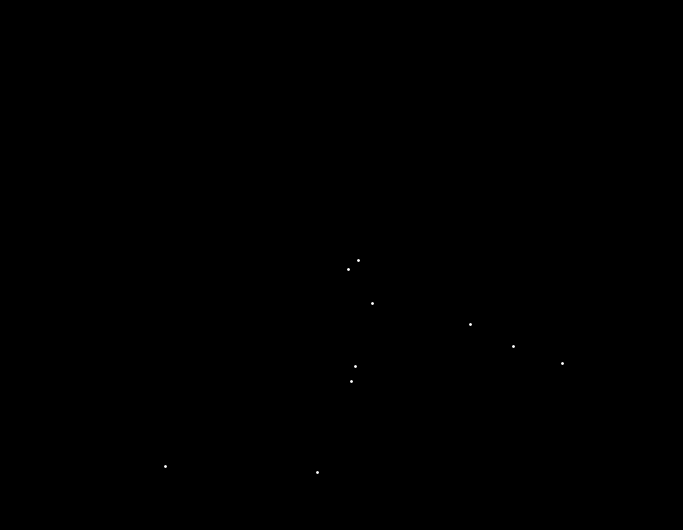

In [1]:
from star_sky_image import star_sky
model = star_sky(RA=1.7421845947129944, DEC=-0.3832227200588656, fov=[58, 47], magnitude_limit=4.0)
A,z,magnitude_visible = model.transform()
(x_fov, y_fov, magnitude_fov), bords = model.filtering_stars(A, z, magnitude_visible)

model.get_image(x_fov, y_fov, bords)

In [ ]:
# Фильтрация звёзд, которые находятся выше горизонта
above_horizon = h >= 0
z_above = z[above_horizon]
A_above = A[above_horizon]
magnitude_above = magnitude_visible[above_horizon]

# Углы поля зрения (в радианах)
angle_x = np.radians(fov[0] / 2)  # Половина углового поля зрения по горизонтали
angle_y = np.radians(fov[1] / 2)  # Половина углового поля зрения по вертикали

# Нахождение границ ksi (lx) и eta (ly)
lx = abs((np.sin(np.pi / 2 + angle_x) * np.cos(np.pi / 2) - np.cos(np.pi / 2 + angle_x) * np.sin(np.pi / 2) * np.cos(0)) / \
         (np.sin(np.pi / 2) * np.sin(np.pi / 2 + angle_x) + np.cos(np.pi / 2 + angle_x) * np.cos(np.pi / 2) * np.cos(0)))

ly = abs((np.sin(np.pi / 2 + angle_y) * np.cos(np.pi / 2) - np.cos(np.pi / 2 + angle_y) * np.sin(np.pi / 2) * np.cos(0)) / \
         (np.sin(np.pi / 2) * np.sin(np.pi / 2 + angle_y) + np.cos(np.pi / 2 + angle_y) * np.cos(np.pi / 2) * np.cos(0)))

# Применение стереографической проекции для координат (A, z)
x_proj = np.tan(z_above / 2) * np.cos(A_above)  # ksi
y_proj = np.tan(z_above / 2) * np.sin(A_above) # eta

# Звезды, которые находятся в поле зрения
in_fov = (x_proj >= -lx) & (x_proj <= lx) & (y_proj >= -ly) & (y_proj <= ly) # маска для массива 
x_fov = np.degrees(x_proj[in_fov])
y_fov = np.degrees(y_proj[in_fov])
magnitude_fov = magnitude_above[in_fov]

In [ ]:
x_proj

In [ ]:
np.degrees(lx), np.degrees(ly)

In [ ]:
x_fov, y_fov

In [ ]:
# Настройка графика
plt.figure(figsize=(8, 8),facecolor='black')
plt.scatter(x_fov, y_fov, s=1, color='white')

# Настройки графика
plt.xlim([-lx, lx])
plt.ylim([-ly, ly])
plt.gca().set_facecolor('black')
plt.gca().set_aspect('equal')
#plt.axis('off')

# Показать график
plt.show()